<a href="https://colab.research.google.com/github/LilChucky/comparison-between-dnn-and-cnn-on-mnist/blob/main/ComparingBasicNNArchitectures.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# TODO plots for val losses on both notebooks

In [ ]:
# importing the libraries (some are necessary)
from tensorflow import keras
from keras.metrics import AUC, Accuracy, Precision, Recall
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

from sklearn.model_selection import KFold, StratifiedKFold
import pandas as pd

In [ ]:
#load the data
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(y_train)

11490434/11490434 [==============================] - 0s 0us/step
[5 0 4 ... 5 6 8]


In [ ]:
#we are talking about RBG (gray here) images. Normalization is easy
x_train = x_train / 255
x_test = x_test/255

In [ ]:
# x_train, x_val, y_train, y_val =\
#  train_test_split(x_train, y_train, test_size=0.1, random_state=1)

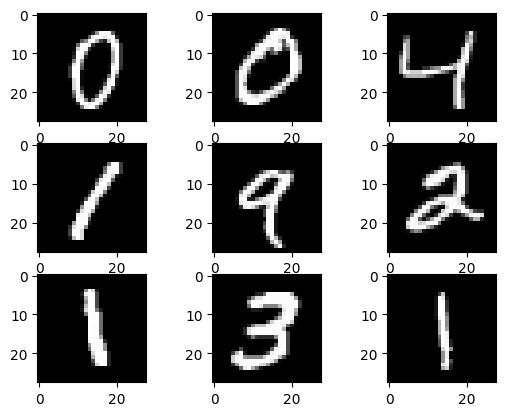

5


In [ ]:
# plot 9 images as gray scale
plt.subplot(331)
plt.imshow(x_train[1000], cmap=plt.get_cmap('gray'))
plt.subplot(332)
plt.imshow(x_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(333)
plt.imshow(x_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(334)
plt.imshow(x_train[3], cmap=plt.get_cmap('gray'))
plt.subplot(335)
plt.imshow(x_train[4], cmap=plt.get_cmap('gray'))
plt.subplot(336)
plt.imshow(x_train[5], cmap=plt.get_cmap('gray'))
plt.subplot(337)
plt.imshow(x_train[6], cmap=plt.get_cmap('gray'))
plt.subplot(338)
plt.imshow(x_train[7], cmap=plt.get_cmap('gray'))
plt.subplot(339)
plt.imshow(x_train[8], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()
plt.pause(4)
print(y_train[0])

In [ ]:
#do some informative plotting
print('Input data (train) shape is:', x_train.shape)
print('Input data (test) shape is:', x_test.shape)
# print('Input data (validation) shape is:', x_val.shape)

print('Output data (train) shape is:', y_train.shape)
print('Output data (test) shape is:', y_test.shape)
# print('Output data (validation) shape is:', y_val.shape)

print('Train set has the following classes:', np.unique(y_train))
print('Test set has the following classes:', np.unique(y_test))

Input data (train) shape is: (60000, 28, 28)
Input data (test) shape is: (10000, 28, 28)
Output data (train) shape is: (60000,)
Output data (test) shape is: (10000,)
Train set has the following classes: [0 1 2 3 4 5 6 7 8 9]
Test set has the following classes: [0 1 2 3 4 5 6 7 8 9]


In [ ]:
# do a one-hot-encoding for the outputs
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)
# y_val = keras.utils.to_categorical(y_val, 10)

In [ ]:
#check the outputs' range (just to be sure)
print(np.max(x_train))
print(np.min(x_train))

1.0
0.0


In [ ]:
# The CNN architecture
def cnnet():
  model = Sequential()
  model.add(keras.Input(shape=(28,28,1)))
  model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(128, activation='relu'))
  model.add(Dropout(0.5))
  model.add(Dense(256, activation='relu'))
  model.add(Dense(10, activation='softmax'))

  return model

In [ ]:
#DNN creating the model architecture
def model_generator(predifined_input_dim = 784,\
              predefined_activation_func = 'relu',\
              predifined_activation_map = 'softmax',\
              predifined_output_num = 10 ):
  net = keras.models.Sequential()
  ##addig the hidden layers
  net.add(keras.layers.Dense(12,input_dim = predifined_input_dim,\
                          activation=predefined_activation_func))
  net.add(keras.layers.Dense(8,input_dim = predifined_input_dim,\
                          activation=predefined_activation_func))
  net.add(keras.layers.Dropout(.1, input_shape=(784,) ))
  net.add(keras.layers.Dense(8,input_dim = predifined_input_dim,\
                          activation=predefined_activation_func))
  net.add(keras.layers.Dropout(.1, input_shape=(784,) ))
  net.add(keras.layers.Dense(8,input_dim = predifined_input_dim,\
                          activation=predefined_activation_func))
  #output layer
  net.add(keras.layers.Dense(predifined_output_num,activation=\
                          predifined_activation_map))
  return net

In [ ]:
# Defining f1 score
def F1Score(precision, recall):
  return 2 * (precision * recall) / (precision + recall) if (precision, recall != 0) else 0

In [ ]:
from keras.layers.attention.multi_head_attention import activation
# Define the K-fold Cross Validator
kfold = KFold(n_splits=6, shuffle=True)

# Define per-fold score containers
cnn_acc_per_fold = []
cnn_loss_per_fold = []
cnn_pre_per_fold = []
cnn_rec_per_fold = []
cnn_auc_per_fold = []
cnn_f1_per_fold = []

cnn_acc_per_fold_test = []
cnn_loss_per_fold_test = []
cnn_pre_per_fold_test = []
cnn_rec_per_fold_test = []
cnn_auc_per_fold_test = []
cnn_f1_per_fold_test = []


# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(x_train, y_train):

  # Define the model architecture

  model = cnnet()

  model.compile(loss=keras.losses.categorical_crossentropy,\
               optimizer='Adam',\
               metrics=[AUC(), "accuracy", Precision(), Recall()])

  # Generate a print
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  cnn_history = model.fit(x_train, y_train, batch_size=125,\
                     validation_split = 0.1,\
                    #  validation_data = (x_val, y_val),\
                     epochs =30)

  # Generate generalization metrics
  CNNscores = model.evaluate(x_train[train], y_train[train],verbose = 0)
  CNNscores_test = model.evaluate(x_train[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {CNNscores[0]}; {model.metrics_names[1]} of {CNNscores[1]*100}%')
  cnn_acc_per_fold.append(CNNscores[2] * 100)
  cnn_loss_per_fold.append(CNNscores[0])
  cnn_pre_per_fold.append(CNNscores[3])
  cnn_rec_per_fold.append(CNNscores[4])
  cnn_auc_per_fold.append(CNNscores[1])
  cnn_f1_per_fold.append(F1Score(CNNscores[3],CNNscores[4]))

  cnn_acc_per_fold_test.append(CNNscores_test[2] * 100)
  cnn_loss_per_fold_test.append(CNNscores_test[0])
  cnn_pre_per_fold_test.append(CNNscores_test[3])
  cnn_rec_per_fold_test.append(CNNscores_test[4])
  cnn_auc_per_fold_test.append(CNNscores_test[1])
  cnn_f1_per_fold_test.append(F1Score(CNNscores_test[3],CNNscores_test[4]))

  fold_no = fold_no + 1

------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/30
432/432 [==============================] - 5s 6ms/step - loss: 0.3954 - auc_1: 0.9898 - accuracy: 0.8722 - precision_1: 0.9377 - recall_1: 0.8286 - val_loss: 0.0606 - val_auc_1: 0.9991 - val_accuracy: 0.9840 - val_precision_1: 0.9876 - val_recall_1: 0.9810
Epoch 2/30
432/432 [==============================] - 3s 7ms/step - loss: 0.1113 - auc_1: 0.9979 - accuracy: 0.9695 - precision_1: 0.9759 - recall_1: 0.9633 - val_loss: 0.0416 - val_auc_1: 0.9992 - val_accuracy: 0.9885 - val_precision_1: 0.9895 - val_recall_1: 0.9870
Epoch 3/30
432/432 [==============================] - 2s 5ms/step - loss: 0.0797 - auc_1: 0.9986 - accuracy: 0.9774 - precision_1: 0.9819 - recall_1: 0.9734 - val_loss: 0.0384 - val_auc_1: 0.9991 - val_accuracy: 0.9900 - val_precision_1: 0.9918 - val_recall_1: 0.9888
Epoch 4/30
432/432 [==============================] - 2s 5ms/step - loss: 0.0628 - auc_1: 0.9988 - 

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(cnn_acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {cnn_loss_per_fold[i]} - Accuracy: {cnn_acc_per_fold[i]}% - AUC: {cnn_auc_per_fold[i]} -  Precision: {cnn_pre_per_fold[i]} - Recall: {cnn_rec_per_fold[i]} - F1: {cnn_f1_per_fold[i]} -')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(cnn_acc_per_fold)} (+- {np.std(cnn_acc_per_fold)})')
print(f'> Loss: {np.mean(cnn_loss_per_fold)}')
print('------------------------------------------------------------------------')

In [ ]:
#1st plot the history performance scores
plt.figure(figsize=(14,6))
plt.plot(cnn_history.history[list(cnn_history.history.keys())[0]])
plt.plot(cnn_history.history[list(cnn_history.history.keys())[5]])
plt.title('model root_mean_squared_error')
plt.ylabel(list(cnn_history.history.keys())[0])
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
#use the trained model to calculate the outputs for train set
y_train_predictedCNN = model.predict(x_train)

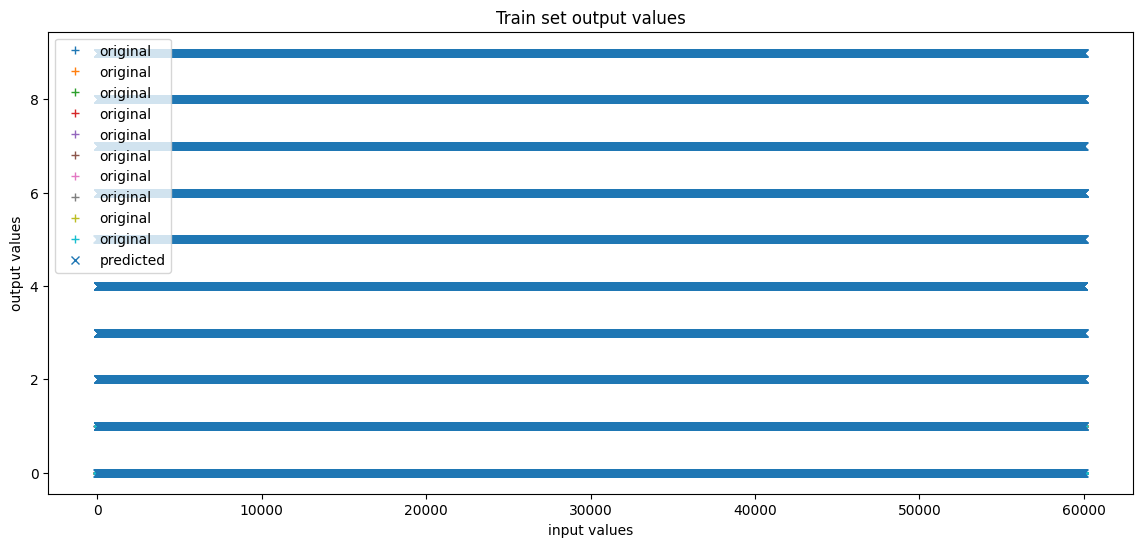

In [ ]:
# Plotting the outputs of the predictions in comparison with the actual outputs(NOT distinguishable)
y_train_predictedCNN = np.argmax(y_train_predictedCNN, axis=1)
plt.figure(figsize=(14,6))
plt.plot( y_train, '+', label='original')
plt.plot( y_train_predictedCNN, 'x', label='predicted')
plt.title('Train set output values')
plt.xlabel('input values')
plt.ylabel('output values')
plt.legend(loc='best')
plt.show()

In [ ]:
#use the trained model to calculate the outputs for test set
y_test_predictedCNN = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


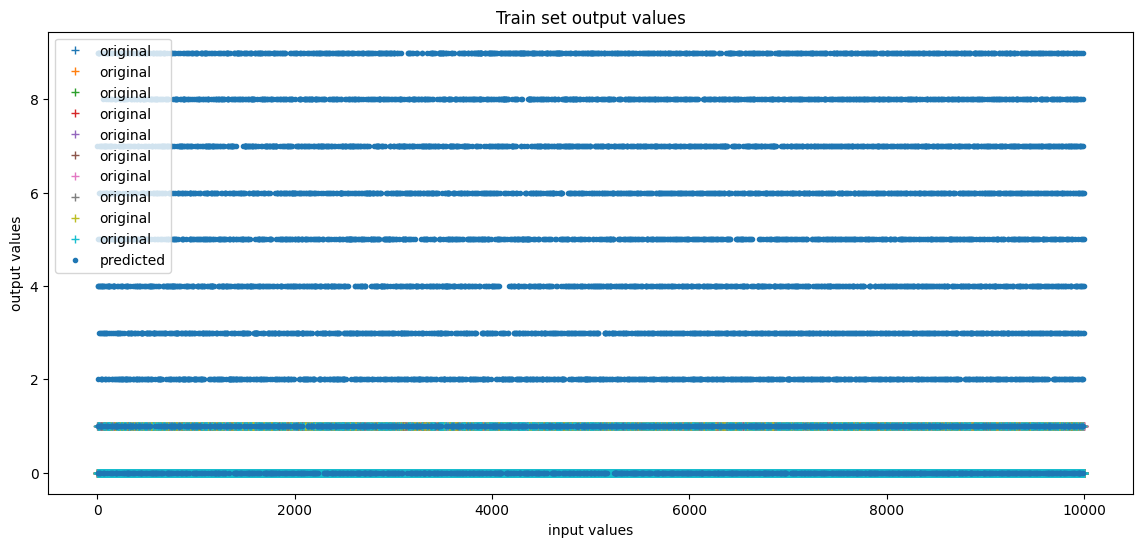

In [ ]:
# Plotting the outputs of the predictions in comparison with the actual outputs(Again NOT distinguishable)
y_test_predictedCNN = np.argmax(y_test_predictedCNN, axis=1)

plt.figure(figsize=(14,6))
plt.plot( y_test, '+', label='original')
plt.plot( y_test_predictedCNN, '.', label='predicted')
plt.title('Train set output values')
plt.xlabel('input values')
plt.ylabel('output values')
plt.legend(loc='best')
plt.show()

In [ ]:
#predictions on train
y_categorical_predict_cnn = to_categorical(y_train_predictedCNN)

accuracy = accuracy_score(y_train, y_categorical_predict_cnn)
recall = recall_score(y_train, y_categorical_predict_cnn, average='macro')
precision = precision_score (y_train, y_categorical_predict_cnn, average='macro')
auc = roc_auc_score(y_train, y_categorical_predict_cnn)
f1= F1Score(precision, recall)

print("The scores for the predicted outputs are : accuracy:", accuracy, " recall:", recall, "precision:", precision, "auc:",auc, "f1:", f1 )

The scores for the predicted outputs are : accuracy: 0.9990166666666667  recall: 0.9990065413325369 precision: 0.9990185515687019 auc: 0.9994486100782662 f1: 0.9990125464145222


In [ ]:
#Predictions on test
y_categorical_predict_cnn_test = to_categorical(y_test_predictedCNN)

accuracy_cnn_test = accuracy_score(y_test, y_categorical_predict_cnn_test)
recall_cnn_test = recall_score(y_test, y_categorical_predict_cnn_test, average='macro')
precision_cnn_test = precision_score (y_test, y_categorical_predict_cnn_test, average='macro')
auc_cnn_test = roc_auc_score(y_test, y_categorical_predict_cnn_test)
f1_cnn_test = F1Score(precision, recall)

print("The scores for the predicted outputs are : accuracy:", accuracy_cnn_test, " recall:", recall_cnn_test, "precision:", precision_cnn_test, "auc:",auc_cnn_test, "f1:", f1_cnn_test )

The scores for the predicted outputs are : accuracy: 0.9924  recall: 0.9923811420730846 precision: 0.9922782318299552 auc: 0.9957690558901904 f1: 0.9990125464145222


In [ ]:
#el Deep network
# Reshaping the data to match the expected inputs of the Dense layers(Trust el plan).
x_train_reshaped = x_train.reshape(60000, x_train.shape[1]*x_train.shape[2])
x_train_reshaped.shape
x_test_reshaped = x_test.reshape(10000, x_test.shape[1]*x_test.shape[2])
x_test_reshaped.shape

(10000, 784)

In [ ]:
# Define the K-fold Cross Validator
kfold = KFold(n_splits=6, shuffle=True)

# Define per-fold score containers
dnn_acc_per_fold = []
dnn_loss_per_fold = []
dnn_pre_per_fold = []
dnn_rec_per_fold = []
dnn_auc_per_fold = []
dnn_f1_per_fold = []

dnn_acc_per_fold_test = []
dnn_loss_per_fold_test = []
dnn_pre_per_fold_test = []
dnn_rec_per_fold_test = []
dnn_auc_per_fold_test = []
dnn_f1_per_fold_test = []

# K-fold Cross Validation model evaluation
fold_no = 1
for train, test in kfold.split(x_train, y_train):
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  CustomModel = model_generator()
  CustomModel.compile(optimizer='adam', loss=keras.losses.CategoricalCrossentropy(),\
                      metrics=[AUC(), "accuracy", Precision(), Recall()])

  historyDNN = CustomModel.fit(x_train_reshaped, y_train, batch_size=100,\
                     validation_split = 0.1,\
                    #  validation_data = (x_val, y_val),\
                     epochs =32)

  # Generate generalization metrics
  scoresDNN = CustomModel.evaluate(x_train_reshaped[train], y_train[train],verbose = 0)
  scoresDNN_test = CustomModel.evaluate(x_train_reshaped[test], y_train[test], verbose=0)
  print(f'Score for fold {fold_no}: {CustomModel.metrics_names[0]} of {scoresDNN[0]}; {CustomModel.metrics_names[1]} of {scoresDNN[1]*100}%')
  dnn_acc_per_fold.append(scoresDNN[2] * 100)
  dnn_loss_per_fold.append(scoresDNN[0])
  dnn_pre_per_fold.append(scoresDNN[3 ])
  dnn_rec_per_fold.append(scoresDNN[4])
  dnn_auc_per_fold.append(scoresDNN[1])
  dnn_f1_per_fold.append(F1Score(scoresDNN[3],scoresDNN[4]))

  cnn_acc_per_fold_test.append(scoresDNN_test[2] * 100)
  cnn_loss_per_fold_test.append(scoresDNN_test[0])
  cnn_pre_per_fold_test.append(scoresDNN_test[3])
  cnn_rec_per_fold_test.append(scoresDNN_test[4])
  cnn_auc_per_fold_test.append(scoresDNN_test[1])
  cnn_f1_per_fold_test.append(F1Score(scoresDNN_test[3],scoresDNN_test[4]))

  fold_no = fold_no + 1

In [ ]:
###use the trained model to calculate the outputs for train set
y_train_predictedDNN = model.predict(x_train)

In [ ]:
from keras.utils import to_categorical
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score

#predictions on train
y_categorical_predict_dnn = to_categorical(y_train_predictedDNN)
#metrics for the trainingset
accuracy_dnn = accuracy_score(y_train, y_categorical_predict_dnn)
recall_dnn = recall_score(y_train, y_categorical_predict_dnn, average='macro')
precision_dnn = precision_score (y_train, y_categorical_predict_dnn, average='macro')
auc_dnn = roc_auc_score(y_train, y_categorical_predict_dnn)
f1_dnn= F1Score(precision, recall)

print("The scores for the predicted outputs are : accuracy:", accuracy_dnn, " recall:", recall_dnn, "precision:", precision_dnn, "auc:",auc_dnn, "f1:", f1_dnn )

In [ ]:
###use the trained model to calculate the outputs for train set
y_test_predictedDNN = model.predict(x_test)

In [ ]:
#predictions on test
y_categorical_predict_dnn = to_categorical(y_test_predictedDNN)
#metrics for the trainingset
accuracy_dnn_test = accuracy_score(y_train, y_categorical_predict_dnn)
recall_dnn_test = recall_score(y_train, y_categorical_predict_dnn, average='macro')
precision_dnn_test = precision_score (y_train, y_categorical_predict_dnn, average='macro')
auc_dnn_test = roc_auc_score(y_train, y_categorical_predict_dnn)
f1_dnn_test = F1Score(precision, recall)

print("The scores for the predicted outputs are : accuracy:", accuracy_dnn_test, " recall:", recall_dnn_test, "precision:", precision_dnn_test, "auc:",auc_dnn_test, "f1:", f1_dnn_test )

In [ ]:
# preparing the arrays for the dataframe
results_acc = []
results_pre = []
results_rec = []
results_f1 = []
techniques = []
Set = []
fold = []

In [ ]:
# -------------------------------------------------------------|
#----------------- ONLY FOR TESTING THE CODE ------------------|
# -------------------------------------------------------------|

# results_acc.clear()
# results_pre.clear()
# results_rec.clear()
# results_f1.clear()
# techniques.clear()
# Set.clear()
# fold.clear()

In [ ]:
# for loops to group the metrics (Ultra junky code)
for i in range(fold_no-1):
  results_acc.append(dnn_acc_per_fold[i])
  results_pre.append(dnn_pre_per_fold[i])
  results_rec.append(dnn_rec_per_fold[i])
  results_f1.append(dnn_f1_per_fold[i])
  techniques.append('DNN')
  Set.append('train')
  fold.append(i)
  results_acc.append(cnn_acc_per_fold_test[i])
  results_pre.append(cnn_pre_per_fold_test[i])
  results_rec.append(cnn_rec_per_fold_test[i])
  results_f1.append(cnn_f1_per_fold_test[i])
  techniques.append('DNN')
  Set.append('test')
  fold.append(i)

for i in range(fold_no-1):
  results_acc.append(cnn_acc_per_fold[i])
  results_pre.append(cnn_pre_per_fold[i])
  results_rec.append(cnn_rec_per_fold[i])
  results_f1.append(cnn_f1_per_fold[i])
  techniques.append('CNN')
  Set.append('train')
  fold.append(i)
  results_acc.append(cnn_acc_per_fold_test[i])
  results_pre.append(cnn_pre_per_fold_test[i])
  results_rec.append(cnn_rec_per_fold_test[i])
  results_f1.append(cnn_f1_per_fold_test[i])
  techniques.append('CNN')
  Set.append('test')
  fold.append(i)

In [ ]:
# CustomModel.evaluate(x_test_reshaped, y_test)

In [ ]:
# == Provide average scores ==
print('------------------------------------------------------------------------')
print('Score per fold')
for i in range(0, len(dnn_acc_per_fold)):
  print('------------------------------------------------------------------------')
  print(f'> Fold {i+1} - Loss: {dnn_loss_per_fold[i]} - Accuracy: {dnn_acc_per_fold[i]}%')
print('------------------------------------------------------------------------')
print('Average scores for all folds:')
print(f'> Accuracy: {np.mean(dnn_acc_per_fold)} (+- {np.std(dnn_acc_per_fold)})')
print(f'> Loss: {np.mean(dnn_loss_per_fold)}')
print('------------------------------------------------------------------------')

In [ ]:
#use the trained model to calculate the outputs for train set
y_train_predictedDNN = CustomModel.predict(x_train_reshaped)

In [ ]:
#  Plotting the outputs of the predictions in comparison with the actual outputs(Once again NOT distinguishable)
y_train_predictedDNN = np.argmax(y_train_predictedDNN, axis=1)
plt.figure(figsize=(14,6))
plt.plot( y_train, '+', label='original')
plt.plot( y_train_predictedDNN, 'x', label='predicted')
plt.title('Train set output values')
plt.xlabel('input values')
plt.ylabel('output values')
plt.legend(loc='best')
plt.show()

In [ ]:
#use the trained model to calculate the outputs for test set
y_test_predictedDNN = CustomModel.predict(x_test_reshaped)

In [ ]:
#  Plotting the outputs of the predictions in comparison with the actual outputs(One last time... NOT distinguishable)
y_test_predictedDNN = np.argmax(y_test_predictedDNN, axis=1)
plt.figure(figsize=(14,6))
plt.plot( y_test, '+', label='original')
plt.plot( y_test_predictedDNN, 'x', label='predicted')
plt.title('Train set output values')
plt.xlabel('input values')
plt.ylabel('output values')
plt.legend(loc='best')
plt.show()

In [ ]:
# Creating the dataset
dict = {'Technique name [DNN/CNN]':techniques,'Set [Train/Test]':Set,\
        'Fold number [1, .., 6]':fold,'Accuracy':results_acc,\
        'Precision':results_pre,'Recall':results_rec,'F1 score':results_f1}
dfNew = pd.DataFrame(dict)

In [ ]:
# Drive mounting to save the dict
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# The dataframe salvation
path = '/content/drive/My Drive/erotima1.csv'
with open(path, 'w', encoding = 'utf-8-sig') as f:
  dfNew.to_csv(f, index = False)

In [ ]:
# Saving the models to use later
model.save('cnn.h5')
CustomModel.save('dnn.h5')